## 01 Import modules

In [1]:
import pandas as pd
import json
import os
import matplotlib
import matplotlib.pyplot as plt 

#### [Opt] Vars

In [2]:
#pd.set_option('display.max_columns', 50)
PATH = r'/run/media/raphi/F6A8C18DA8C14CB5/Users/Raphael/Documents/Universität/Master/WS 22-23/Digital Humanities/Korpus/formats/internal'
data_list = []

#### [Opt] Funcs

In [3]:
def set_dtypes(df):
    df['id'] = df['id'].astype('Int32')
    df['mbti_profile'] = df['mbti_profile'].astype('string')
    df['contributor_create_date'] = df['contributor_create_date'].astype('string')
    df['is_active'] = df['is_active'].astype('bool')
    df['is_approved'] = df['is_approved'].astype('bool')
    df['mbti_type'] = df['mbti_type'].astype('category')
    df['watch_count'] = df['watch_count'].astype('Int32')
    df['comment_count'] = df['comment_count'].astype('Int32')
    df['vote_count_mbti'] = df['vote_count_mbti'].astype('Int32')
    df['total_vote_counts'] = df['total_vote_counts'].astype('Int32')
    df['cat_id'] = df['cat_id'].astype('Int8')
    df['category'] = df['category'].astype('category')
    df['sub_cat_id'] = df['sub_cat_id'].astype('Int32')
    df['subcategory'] = df['subcategory'].astype('category')
    df['functions'] = df['functions'].astype('string')
    df['category_is_fictional'] = df['category_is_fictional'].astype('bool')
    return df

#### [Opt] Read data from JSONs

In [ ]:
ct = 0
for file in os.listdir(PATH):
        if (ct % 10000) == 0:
                print(f'{ct} file done')
        if file.endswith(".json"):
                with open(rf'{PATH}/{file}') as f:
                        data = json.load(f)
                data_list.append(data)
                ct += 1

#### [Opt] Create Dataframe

In [5]:
dataframe = pd.DataFrame(data_list)
dataframe['mbti_type']= dataframe.mbti_type.str.split(' ').str[0]
dataframe = set_dtypes(dataframe)

#### [Opt] Store Dataframe with Feather
- Write: 0.783s
- Read: 0.583s
- Size: 13MB

In [6]:
dataframe.to_feather('complete.feather')

## 02 Load Data from Feather file

In [2]:
dataframe=pd.read_feather('complete.feather')

## 03 Clear Data
518484 datapoints

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518484 entries, 0 to 518483
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       518484 non-null  Int32   
 1   mbti_profile             518484 non-null  string  
 2   contributor_create_date  518484 non-null  string  
 3   is_active                518484 non-null  bool    
 4   is_approved              518484 non-null  bool    
 5   mbti_type                518484 non-null  category
 6   watch_count              518484 non-null  Int32   
 7   comment_count            518484 non-null  Int32   
 8   vote_count_mbti          518484 non-null  Int32   
 9   total_vote_counts        518484 non-null  Int32   
 10  cat_id                   518484 non-null  Int8    
 11  category                 518484 non-null  category
 12  sub_cat_id               518484 non-null  Int32   
 13  subcategory              518484 non-null  ca

### 03.1 Reduce to fictional categories
433 150 datapoint remaining

In [4]:
fictional_df = dataframe.query("category_is_fictional == True").copy()

### 03.2 Remove entries with small amount of votes
Threshhold "5":\
218 270 datapoints remaining

In [10]:
THRESHHOLD = 5
reduced_df = fictional_df.query(f"total_vote_counts >= {THRESHHOLD}").copy()

### 03.2 Remove entries where mbti_type is uncertain (i.e. contains char 'x')

206 390 datapoints remaining

In [11]:
rows_with_x = reduced_df[reduced_df.mbti_type.str.contains('X',case=False)].copy()
reduced_df = pd.concat([reduced_df, rows_with_x])
reduced_df = reduced_df.drop_duplicates('id', keep=False).copy()

## 04 Analysis

### 4.1 Overall Data
206 390 datapoints

In [12]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250649 entries, 1 to 518479
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       250649 non-null  Int32   
 1   mbti_profile             250649 non-null  string  
 2   contributor_create_date  250649 non-null  string  
 3   is_active                250649 non-null  bool    
 4   is_approved              250649 non-null  bool    
 5   mbti_type                250649 non-null  category
 6   watch_count              250649 non-null  Int32   
 7   comment_count            250649 non-null  Int32   
 8   vote_count_mbti          250649 non-null  Int32   
 9   total_vote_counts        250649 non-null  Int32   
 10  cat_id                   250649 non-null  Int8    
 11  category                 250649 non-null  category
 12  sub_cat_id               250649 non-null  Int32   
 13  subcategory              250649 non-null  ca

### 4.2 Data per Category
Fictional Categories only:
- Gaming                   : 79745
- Television               : 78084
- Movies                   : 51230
- Anime & Manga            : 55235
- Web Comics               : 18469
- Cartoons                 : 29266
- Music                    : 39938
- Theatre                  :  3104
- Archetypes               :  8031
- Literature               : 37105
- Interests                : 10414
- Type Combo (Your Type)   :   701
- Superheroes              :  4958
- Comics                   :  3345
- Franchises               :  3628
- Settings                 :  2682
- Polls (If you...)        :  1992
- Ask PDB                  :  1025
- Plots                    :  1576
- Theories                 :  2359
- Your Experience          :   263

In [14]:
fictional_df.groupby('category', observed=True)['id'].count()

category
Gaming                    79745
Television                78084
Movies                    51230
Anime & Manga             55235
Web Comics                18469
Cartoons                  29266
Music                     39938
Theatre                    3104
Archetypes                 8031
Literature                37105
Interests                 10414
Type Combo (Your Type)      701
Superheroes                4958
Comics                     3345
Franchises                 3628
Settings                   2682
Polls (If you...)          1992
Ask PDB                    1025
Plots                      1576
Theories                   2359
Your Experience             263
Name: id, dtype: int64

### 4.3 Highest occurences of mbti_types in corpus

<Axes: xlabel='mbti_type'>

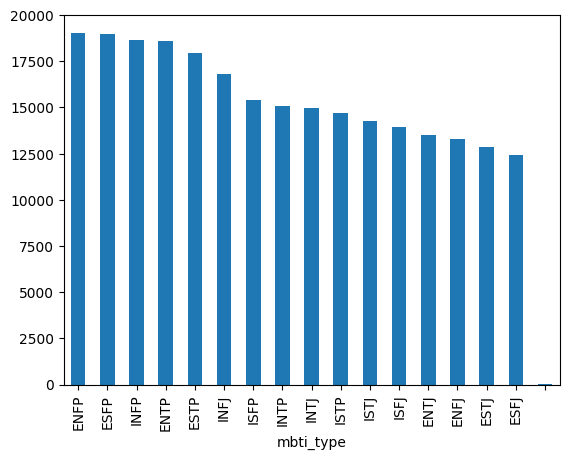

In [13]:
reduced_df.groupby('mbti_type', observed=True)['id']\
    .count()\
    .sort_values(ascending=False)\
    .plot.bar()

### 4.4 Highest occurences of mbti_types by category

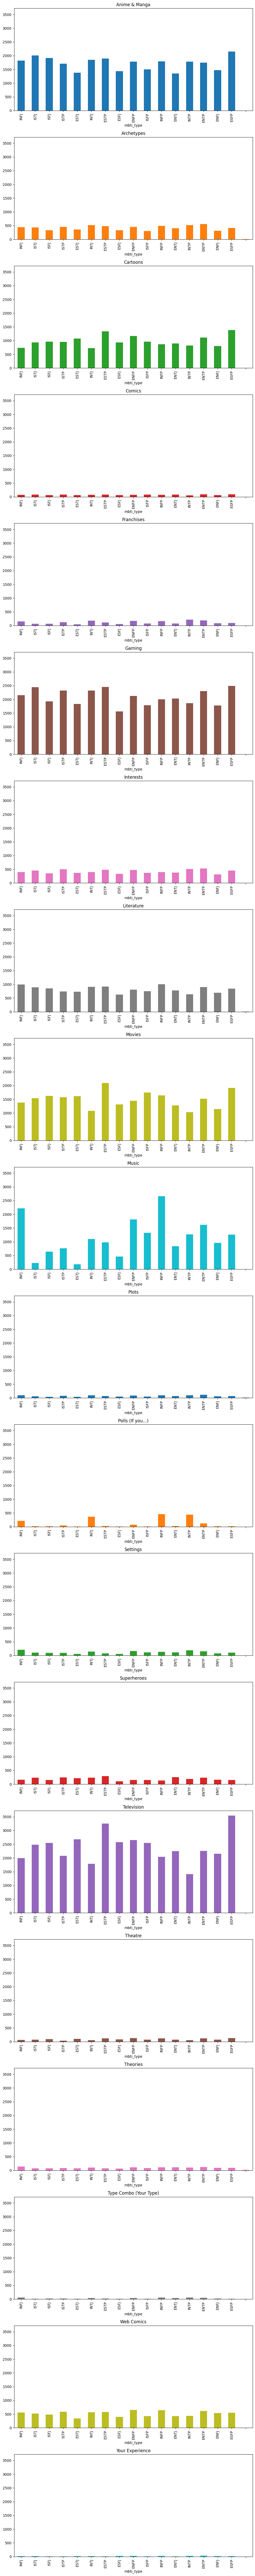

In [14]:
pivot = reduced_df.pivot_table(\
    index=['mbti_type'],\
    columns=['category'],\
    values='id',\
    aggfunc={'id': 'count'},\
    observed=True)

pivot.plot(\
    subplots=True,\
    sharey=True,\
    #grid=True,\
    layout=(20,1),\
    figsize=(10,100),\
    kind='bar',\
    sharex=False,\
    legend=False)

plt.tight_layout()